In [5]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from helpers import *
from scipy.spatial.transform import Rotation

In [6]:
K1 = K2 = np.array([
    [1000, 0, 300],
    [0, 1000, 200],
    [0, 0, 1],
])
R1 = np.eye(3)
t1 = np.zeros((3,1))
R2 = Rotation.from_euler('xyz', [0.7, -0.5, 0.8]).as_matrix()
t2 = np.array([[.2, 2, 1]]).T

In [7]:
p1 = np.array([[1,.5,4,1]])
px1,py1 = projectpoints(K1, R1, t1, p1)
q1 = np.array([[px1[0],py1[0]]]).T
px2,py2 = projectpoints(K2, R2, t2, p1)
q2 = np.array([[px2[0],py2[0]]]).T
q1,q2

(array([[550.],
        [325.]]),
 array([[582.47256835],
        [185.98985776]]))

In [8]:
def cross_op(p):
    if p.shape != (3,1):
        p = p.reshape(3,1)
    x,y,z = p[0][0], p[1][0], p[2][0] 
    return np.array([
        [0, -z, y],
        [z, 0, -x],
        [-y, x, 0]
    ])
# so it works!
cross_op(np.append(q1,1)) @ np.append(q2,1), np.cross(np.append(q1,1),np.append(q2,1))

(array([ 1.39010142e+02,  3.24725684e+01, -8.70091629e+04]),
 array([ 1.39010142e+02,  3.24725684e+01, -8.70091629e+04]))

In [9]:
E = cross_op(t2) @ R2
F = np.linalg.inv(K2).T @ E @ np.linalg.inv(K1)
F

array([[ 3.29311881e-07,  8.19396327e-07,  1.79162592e-03],
       [ 5.15532551e-07, -8.76915984e-07,  9.31426656e-05],
       [-1.29882755e-03,  1.51951700e-03, -1.10072682e+00]])

In [10]:
line = F @ np.append(4*q1,4) # the answer applies this to org scaled point, s=4
line 

array([ 8.95620504e-03,  3.66751496e-04, -5.28495581e+00])

In [11]:
np.append(4*q2.T,4) @ F @ np.append(4*q1,4) # this must be zero for point to lie on epipolar line

7.105427357601002e-15

In [12]:
np.append(q2.T,1).T@line # this is shown in lecture notes eq 1.2 
# and this must be zero because p1,p2 are taken from single 3D point

1.7763568394002505e-15

In [13]:
# 3.8
import numpy as np
data = np.load('data/TwoImageData.npy', allow_pickle=True).item()
data

{'im1': array([[17, 17, 14, ..., 19, 18, 20],
        [15, 16, 15, ..., 18, 17, 19],
        [14, 14, 15, ..., 18, 18, 21],
        ...,
        [13, 14, 16, ...,  4,  4,  5],
        [13, 13, 14, ...,  4,  5,  6],
        [12, 13, 14, ...,  6,  6,  5]], dtype=uint8),
 'im2': array([[14, 15, 12, ..., 22, 20, 21],
        [13, 14, 14, ..., 21, 19, 20],
        [13, 12, 13, ..., 19, 20, 22],
        ...,
        [14, 19, 38, ...,  5,  5,  6],
        [27, 56, 90, ...,  5,  6,  7],
        [49, 76, 74, ...,  5,  7,  6]], dtype=uint8),
 'R1': array([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]]),
 'R2': array([[ 9.97063888e-01,  1.21564307e-04,  7.65740684e-02],
        [-1.37753401e-04,  9.99999969e-01,  2.06135565e-04],
        [-7.65740409e-02, -2.16078666e-04,  9.97063874e-01]]),
 't1': array([[0.],
        [0.],
        [0.]]),
 't2': array([[-0.04594547],
        [-0.00017171],
        [ 0.00157051]]),
 'K': array([[1.41448973e+03, 0.00000000e+00, 4.01393651e+02],
       

In [14]:
im1,im2,R1,R2,t1,t2,K = data['im1'] ,data["im2"] ,data["R1"] ,data["R2"] ,data["t1"] ,data["t2"] ,data["K"]

In [15]:
K1 = K2 = K
from helpers import *
E = cross_op(t2) @ R2
Ftrue = np.linalg.inv(K2).T @ E @ np.linalg.inv(K1)
Ftrue / np.linalg.norm(Ftrue)

array([[ 3.07914555e-08, -3.61883689e-06,  5.43583727e-04],
       [-4.49876682e-06, -2.24402705e-08,  1.51520136e-01],
       [ 1.95223414e-03, -1.48295604e-01, -9.77264527e-01]])

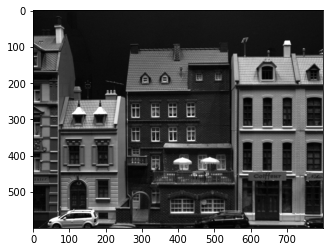

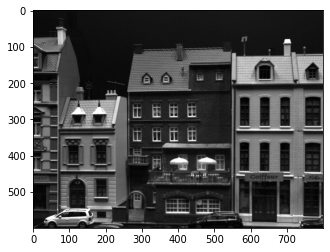

In [16]:
def show2img(im1,im2):
    import matplotlib.pyplot as plt
    plt.figure(1)
    plt.imshow(im1,cmap='gray')
    plt.figure(2)
    plt.imshow(im2,cmap='gray')
show2img(im1,im2)

In [17]:
def DrawLine(l, shape):
    #Checks where the line intersects the four sides of the image
    # and finds the two intersections that are within the frame
    def in_frame(l_im):
        q = np.cross(l.flatten(), l_im)
        q = q[:2]/q[2]
        if all(q>=0) and all(q+1<=shape[1::-1]):
            return q
    lines = [[1, 0, 0], [0, 1, 0], [1, 0, 1-shape[1]], [0, 1, 1-shape[0]]]
    P = [in_frame(l_im) for l_im in lines if in_frame(l_im) is not None]
    print(P); plt.plot(*np.array(P).T)

[array([ -0.       , 496.7786537]), array([799.        , 503.47236858])]


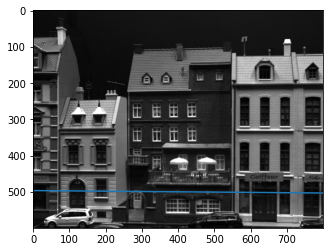

In [18]:
pixel = 500 # point on first image
point_on_the_first = np.array([[pixel,pixel]]).T
# get the epipolar line for this point
E = cross_op(t2) @ R2
F = np.linalg.inv(K).T @ E @ np.linalg.inv(K)
line = F @ np.append(point_on_the_first,1) # the answer applies this to org scaled point, s=4
plt.imshow(im2,cmap='gray')
DrawLine(line,im2.shape)

In [19]:
# P = K @ R @ t
P1 = K @ np.concatenate((R1,t1),axis=1)
P2 = K @ np.concatenate((R2,t2),axis=1)

point = p1.copy()
px1,py1 = projectpoints(K, R1, t1, point)
q1 = np.array([[px1[0],py1[0]]]).T
px2,py2 = projectpoints(K, R2, t2, point)
q2 = np.array([[px2[0],py2[0]]]).T
q1,q2

Q = np.append(np.concatenate([q1,q2],axis=1),np.array([[1,1]]),axis=0).T
P = [P1,P2]

B = [
    P[0][2]*Q[0][0] - P[0][0],
    P[0][2]*Q[0][1] - P[0][1],
    P[1][2]*Q[1][0] - P[1][0],
    P[1][2]*Q[1][1] - P[1][1],
]

B
u,s,v = np.linalg.svd(B)
u.shape,s.shape,v.shape
v[-1]/v[-1][-1],point # EQUAL!

(array([1. , 0.5, 4. , 1. ]), array([[1. , 0.5, 4. , 1. ]]))